In [11]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from tqdm.notebook import tqdm
import os
import seaborn as sns
sns.set(style="whitegrid", font="FreeSans")

In [12]:
task_data = pd.read_csv("gambling_clean_data.csv")
model_assignment = pd.read_csv("LL_model2.csv")
palette = {'Declarative' : 'tomato', 'Procedural' : 'steelblue'}

In [13]:
alldata = pd.merge(task_data, model_assignment, on=["HCPID"])
bytrial = alldata.groupby(["HCPID", "TrialType", "best.model"], as_index=False).aggregate({'ResponseSwitch' : 'mean'})
bytrial=bytrial.reset_index()
bytrial

,index,HCPID,TrialType,best.model,ResponseSwitch
0,0,100307_fnca,Neutral,Procedural,0.500000
1,1,100307_fnca,Punishment,Procedural,0.400000
2,2,100307_fnca,Reward,Procedural,0.640000
3,3,100408_fnca,Neutral,Procedural,0.500000
4,4,100408_fnca,Punishment,Procedural,0.565217
...,...,...,...,...,...
592,592,992774_fnca,Punishment,Procedural,0.320000
593,593,992774_fnca,Reward,Procedural,0.560000
594,594,994273_fnca,Neutral,Procedural,0.500000
595,595,994273_fnca,Punishment,Procedural,0.363636


In [14]:
bytrial.value_counts('best.model')

best.model
Procedural     492
Declarative    105
dtype: int64

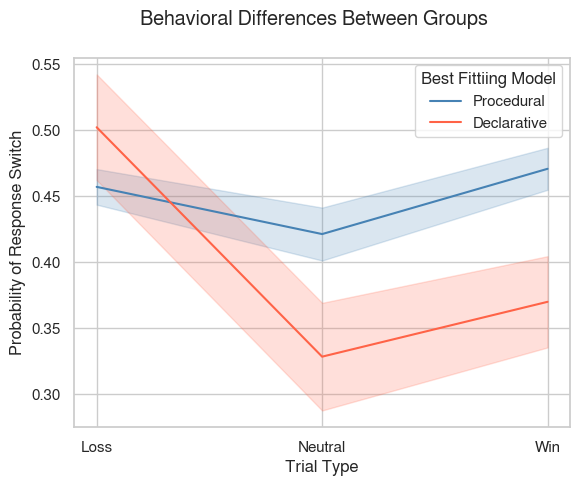

In [15]:
bytrial = bytrial.replace({"TrialType" : {"Reward" : "Win", "Punishment" : "Loss"}})
bytrial = bytrial.sort_values("TrialType")
ax = sns.lineplot(data=bytrial, x="TrialType", y="ResponseSwitch", hue="best.model", errorbar='se', sort=False, palette=palette)
ax.set(xlabel = "Trial Type", ylabel = "Probability of Response Switch")
plt.legend(loc='upper right', title="Best Fitting Model")
plt.suptitle("Behavioral Differences Between Groups")
plt.show()

In [16]:
byblock = alldata.groupby(["HCPID", "BlockTypeCoded", "best.model"], as_index=False).aggregate({'ConsecSameResp' : 'max'})
byblock = byblock.reset_index()
byblock

,index,HCPID,BlockTypeCoded,best.model,ConsecSameResp
0,0,100307_fnca,MostlyPunishment,Procedural,4
1,1,100307_fnca,MostlyReward,Procedural,3
2,2,100408_fnca,MostlyPunishment,Procedural,5
3,3,100408_fnca,MostlyReward,Procedural,3
4,4,101006_fnca,MostlyPunishment,Procedural,4
...,...,...,...,...,...
393,393,178950_fnca,MostlyReward,Procedural,4
394,394,992774_fnca,MostlyPunishment,Procedural,6
395,395,992774_fnca,MostlyReward,Procedural,4
396,396,994273_fnca,MostlyPunishment,Procedural,13


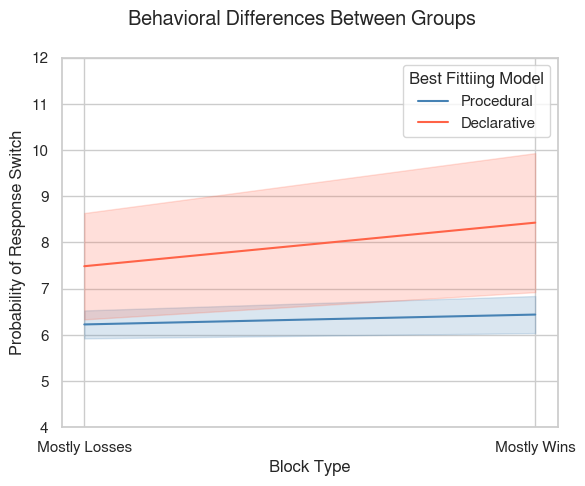

In [17]:
byblock = byblock.replace({"BlockTypeCoded" : {"MostlyReward" : "Mostly Wins", "MostlyPunishment" : "Mostly Losses"}})
byblock = byblock.sort_values("BlockTypeCoded")
ax = sns.lineplot(data=byblock, x="BlockTypeCoded", y="ConsecSameResp", hue="best.model", errorbar='se', sort=False, palette=palette)
ax.set(xlabel = "Block Type", ylabel = "Probability of Response Switch", ylim=(4, 12))
plt.legend(loc='upper right', title="Best Fittiing Model")
plt.suptitle("Behavioral Differences Between Groups")
plt.show()

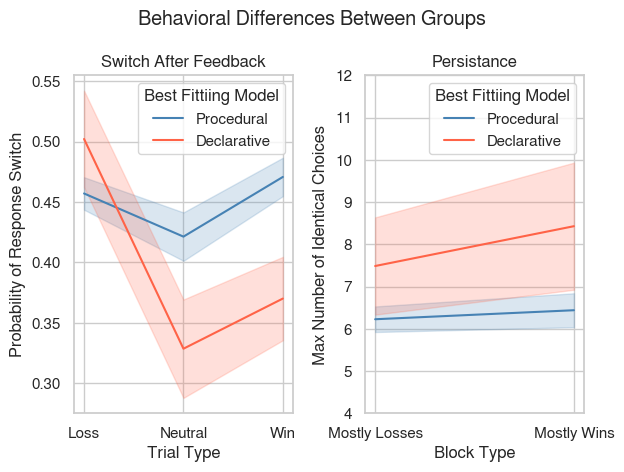

In [18]:
fig, axs = plt.subplots(1, 2)
ax = sns.lineplot(data=bytrial, x="TrialType", y="ResponseSwitch", hue="best.model", errorbar='se', sort=False, ax=axs[0], palette=palette)
ax.set(xlabel = "Trial Type", ylabel = "Probability of Response Switch", title="Switch After Feedback")
ax.legend(loc='upper right', title="Best Fittiing Model")

ax = sns.lineplot(data=byblock, x="BlockTypeCoded", y="ConsecSameResp", hue="best.model", errorbar='se', ax=axs[1], sort=False, palette=palette)
ax.set(xlabel = "Block Type", ylabel = "Max Number of Identical Choices", ylim=(4, 12), title="Persistance")
ax.legend(loc='upper right', title="Best Fitting Model")
plt.suptitle("Behavioral Differences Between Groups")
plt.tight_layout()
plt.show()